Connected to caiman (Python 3.10.8)

In [1]:
from Cell_Class.Stim_Calculators import Stim_Cells
from Cell_Class.Format_Cell import Cell
import OS_Tools_Kit as ot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import cv2
from sklearn.model_selection import cross_val_score
from sklearn import svm
from scipy.stats import pearsonr
import scipy.stats as stats
from Cell_Class.Plot_Tools import Plot_3D_With_Labels
import copy
from Cell_Class.Advanced_Tools import *
from Cell_Class.Classifier_Analyzer import *
from Cell_Class.Timecourse_Analyzer import *
from Review_Fix_Funcs import *
from Filters import Signal_Filter_v2
import warnings

all_path_dic = list(ot.Get_Subfolders(r'D:\#Fig_Data\_All_Spon_Data_V1'))

all_path_dic.pop(4)
all_path_dic.pop(6)
save_path = r'D:\_GoogleDrive_Files\#Figs\#250211_Revision1\FigS2'

d:\Anaconda\envs\caiman\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from scipy.signal import find_peaks,peak_widths
burstiness = pd.DataFrame(columns = ['Loc','Cell','Burstiness'])
freqs = []
for i,cloc in enumerate(all_path_dic):
    cloc_name = cloc.split('\\')[-1]
    ac = ot.Load_Variable_v2(cloc,'Cell_Class.pkl')
    c_spon = ot.Load_Variable(cloc,'Spon_Before.pkl')
    spon_start = c_spon.index[0]
    spon_end = c_spon.index[-1]
    c_spon = Z_refilter(ac,'1-001',spon_start,spon_end).T
    for j in range(len(ac)):
        c_series = c_spon[:,j]
        peaks,_ = find_peaks(c_series, height=-0.5,distance=5,prominence=1) 
        c_raster = np.zeros(len(c_series))
        c_raster[peaks]=1
        cc_bur = Burstiness_Index_JN(c_raster)
        burstiness.loc[len(burstiness)] = [cloc_name,j+1,cc_bur]
        freqs.append(len(peaks)*1.301/len(c_spon))
freqs = np.array(freqs)
# ot.Save_Variable(save_path,'Burstiness',burstiness)

649it [00:00, 2799.48it/s]
509it [00:00, 2602.75it/s]
524it [00:00, 3132.18it/s]
489it [00:00, 2356.07it/s]
619it [00:00, 2357.45it/s]
604it [00:00, 2339.83it/s]
678it [00:00, 2681.53it/s]
482it [00:00, 2374.34it/s]


In [3]:
burstiness

,Loc,Cell,Burstiness
0,L76_15A_220812,1,0.058571
1,L76_15A_220812,2,0.049255
2,L76_15A_220812,3,0.054493
3,L76_15A_220812,4,0.055441
4,L76_15A_220812,5,0.051546
...,...,...,...
4549,L91_8A_220504,478,0.072633
4550,L91_8A_220504,479,0.042286
4551,L91_8A_220504,480,0.049692
4552,L91_8A_220504,481,0.052003


In [4]:
burstiness['Burstiness']

0       0.058571
1       0.049255
2       0.054493
3       0.055441
4       0.051546
          ...   
4549    0.072633
4550    0.042286
4551    0.049692
4552    0.052003
4553    0.103784
Name: Burstiness, Length: 4554, dtype: float64

In [5]:
np.array(burstiness['Burstiness'])

array([0.0585708 , 0.04925474, 0.05449296, ..., 0.04969208, 0.05200341,
       0.10378419])

In [6]:
np.mean(burstiness['Burstiness'])

0.06401349108613234

(array([3.423e+03, 1.086e+03, 3.200e+01, 1.000e+01, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.03714331, 0.07787343, 0.11860354, 0.15933365, 0.20006377,
        0.24079388, 0.28152399, 0.3222541 , 0.36298422, 0.40371433,
        0.44444444]),
 <BarContainer object of 10 artists>)

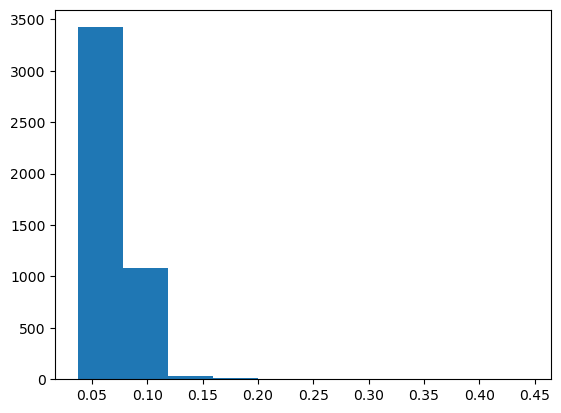

In [7]:
plt.hist(burstiness['Burstiness'])

(array([1.076e+03, 1.579e+03, 5.610e+02, 4.450e+02, 5.410e+02, 2.640e+02,
        4.300e+01, 1.800e+01, 7.000e+00, 6.000e+00, 4.000e+00, 3.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.03714331, 0.04878049, 0.06041766, 0.07205484, 0.08369201,
        0.09532919, 0.10696636, 0.11860354, 0.13024071, 0.14187789,
        0.15351506, 0.16515224, 0.17678941, 0.18842659, 0.20006377,
        0.21170094, 0.22333812, 0.23497529, 0.24661247, 0.25824964,
        0.26988682, 0.28152399, 0.29316117, 0.30479834, 0.31643552,
        0.32807269, 0.33970987, 0.35134704, 0.36298422, 0.37462139,
        0.38625857, 0.39789574, 0.40953292, 0.42117009, 0.43280727,
        0.44444444]),
 <BarContainer object of 35 artists>)

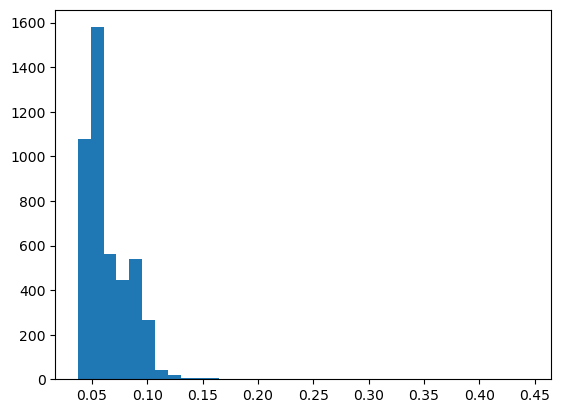

In [8]:
plt.hist(burstiness['Burstiness'],bins = 35)

In [9]:
burstiness['Burstiness'].std()

0.020652747809881924

In [10]:
burstiness['Burstiness'].mean()

0.06401349108613234

In [11]:
cc_bur = Burstiness_Index_JN(c_raster,winnum=500)

In [12]:
cc_bur

0.12026976395653804

In [13]:
c_raster.sum()

785.0

In [14]:
from scipy.signal import find_peaks,peak_widths
burstiness = pd.DataFrame(columns = ['Loc','Cell','Burstiness'])
burstiness_rand = pd.DataFrame(columns = ['Loc','Cell','Burstiness'])
freqs = []
N_shuffle = 10
for i,cloc in enumerate(all_path_dic):
    cloc_name = cloc.split('\\')[-1]
    ac = ot.Load_Variable_v2(cloc,'Cell_Class.pkl')
    c_spon = ot.Load_Variable(cloc,'Spon_Before.pkl')
    spon_start = c_spon.index[0]
    spon_end = c_spon.index[-1]
    c_spon = Z_refilter(ac,'1-001',spon_start,spon_end).T
    for j in range(len(ac)):
        c_series = c_spon[:,j]
        peaks,_ = find_peaks(c_series, height=-0.5,distance=5,prominence=1) 
        c_raster = np.zeros(len(c_series))
        c_raster[peaks]=1
        cc_bur = Burstiness_Index_JN(c_raster,winnum=500)
        for k in range(N_shuffle):
            c_raster_s = Rand_Series(int(c_raster.sum()),len(c_raster))
            cc_bur_s = Burstiness_Index_JN(c_raster,winnum=500)
            burstiness_rand.loc[len(burstiness_rand)] = [cloc_name,j+1,cc_bur_s]
        burstiness.loc[len(burstiness)] = [cloc_name,j+1,cc_bur]
        freqs.append(len(peaks)*1.301/len(c_spon))
freqs = np.array(freqs)
ot.Save_Variable(save_path,'Burstiness_V1',burstiness)

649it [00:00, 2500.24it/s]
509it [00:00, 2394.23it/s]
524it [00:00, 2832.41it/s]
489it [00:00, 2106.17it/s]
619it [00:00, 2142.63it/s]
604it [00:00, 2192.48it/s]
678it [00:00, 2534.51it/s]
482it [00:00, 2235.49it/s]


True

In [15]:
ot.Save_Variable(save_path,'Burstiness_V1',burstiness)
ot.Save_Variable(save_path,'Burstiness_V1_shuffle10',burstiness_rand)

True

In [16]:
burstiness_rand

,Loc,Cell,Burstiness
0,L76_15A_220812,1,0.083844
1,L76_15A_220812,1,0.083844
2,L76_15A_220812,1,0.083844
3,L76_15A_220812,1,0.083844
4,L76_15A_220812,1,0.083844
...,...,...,...
45535,L91_8A_220504,482,0.120270
45536,L91_8A_220504,482,0.120270
45537,L91_8A_220504,482,0.120270
45538,L91_8A_220504,482,0.120270


In [17]:
burstiness_rand['Burstiness'].mean()

0.08463334552321025

In [18]:
burstiness_rand['Burstiness'].std()

0.031663927885462434

In [19]:
all_path_dic_v2 = list(ot.Get_Subfolders(r'D:\#Fig_Data\_All_Spon_Data_V2'))
burstiness_v2 = pd.DataFrame(columns = ['Loc','Cell','Burstiness'])
burstiness_rand_v2 = pd.DataFrame(columns = ['Loc','Cell','Burstiness'])
freqs_v2 = []
N_shuffle = 10
for i,cloc in enumerate(all_path_dic_v2):
    cloc_name = cloc.split('\\')[-1]
    ac = ot.Load_Variable_v2(cloc,'Cell_Class.pkl')
    c_spon = ot.Load_Variable(cloc,'Spon_Before.pkl')
    spon_start = c_spon.index[0]
    spon_end = c_spon.index[-1]
    c_spon = Z_refilter(ac,'1-001',spon_start,spon_end).T
    for j in range(len(ac)):
        c_series = c_spon[:,j]
        peaks,_ = find_peaks(c_series, height=-0.5,distance=5,prominence=1) 
        c_raster = np.zeros(len(c_series))
        c_raster[peaks]=1
        cc_bur = Burstiness_Index_JN(c_raster,winnum=500)
        for k in range(N_shuffle):
            c_raster_s = Rand_Series(int(c_raster.sum()),len(c_raster))
            cc_bur_s = Burstiness_Index_JN(c_raster,winnum=500)
            burstiness_rand_v2.loc[len(burstiness_rand_v2)] = [cloc_name,j+1,cc_bur_s]
        burstiness_v2.loc[len(burstiness_v2)] = [cloc_name,j+1,cc_bur]
        freqs_v2.append(len(peaks)*1.301/len(c_spon))
freqs_v2 = np.array(freqs_v2)
ot.Save_Variable(save_path,'Burstiness_V2',burstiness_v2)
ot.Save_Variable(save_path,'Burstiness_V2_shuffle10',burstiness_rand_v2)

368it [00:00, 1913.48it/s]
